## 작업 준비

### 패키지 및 그래프 초기화

In [1]:
import sys

sys.path.append("../../../")
import helper
import numpy as np
from pandas import read_excel, concat, DataFrame
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

# 문제 1-1

아래의 데이터는 콩의 수분 함유량에 따른 강도를 조사한 데이터이다.

https://data.hossam.kr/E04/beans.xlsx

위의 데이터를 다항선형회귀모델을 적용하여 분석으로 설명력/에러율/결과표를 제시한 후, 수분함유량에 따른 강도의 산점도와 추세선을 시각화 하라.

표준화는 적용하지 않습니다.

## 1) 콩의 수분 함유량에 따른 강도 조사 데이터 분석

### 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
# concat을 사용한 데이터 증강 - 많을 수록 VIF, 설명력 개선
# 머신러닝의 1차 성능은 데이터의 양에 따라서 결정됨 - 최소 5000건 이상의 데이터를 요구.
origin = concat([origin, origin^2, origin^3, origin^4]) 
origin.reset_index(drop=True, inplace=True)
origin.shape

(40, 2)

### 회귀분석 수행

In [4]:
ols = helper.ml_ols(origin, xnames="수분함유량", yname="강도", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

ols.table

계수:  [0.79498541 0.27989827]
절편:  -0.36741459178537567
훈련데이터의 설명력:  0.8051396273996151
R^2:  0.8051396273996151
MAE:  0.3286736658312005
MSE:  0.17054788992679384
RMSE:  0.41297444221984714
MAPE:  390.4140340382866
MPE:  331.9141567147791


,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,강도,수분함유량,0.794985,0.098305,0,8.086923,1.065331e-09,3.639804
1,강도,수분함유량^2,0.279898,0.072516,0,3.859814,4.395103e-04,1.444778


### 시각화

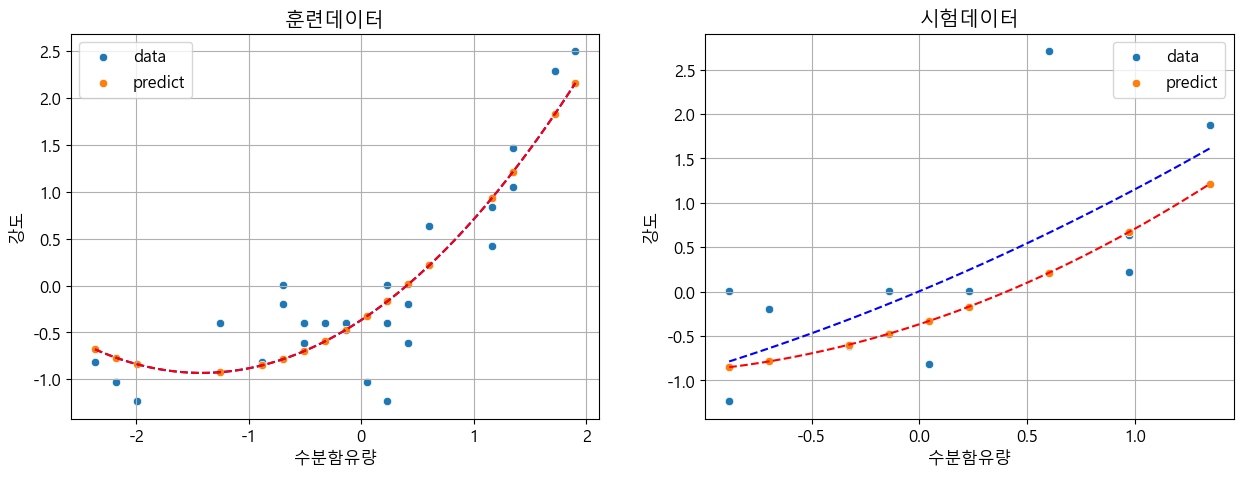

In [5]:
helper.regplot(ols.x_train['수분함유량'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['수분함유량'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

# 문제 1-2

## 에어컨 예약대수에 따른 실 판매대수 분석

아래의 데이터는 10년간 에어컨의 예약대수에 따른 실 판매대수를 조사한 가상의 데이터이다.

https://data.hossam.kr/E04/aircon.xlsx

### 요구사항

1. 위 데이터를 분석하고 결과를 보고하시오.
2. 기록적인 폭염으로 올해 에어컨 예약 대수는 150대였다. 실 판매대수를 예측하시오.

### 데이터 가져오기

In [6]:
origin = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
# origin = concat([origin, origin, origin, origin, origin])
# origin.reset_index(drop=True, inplace=True)
origin.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


### 분석 수행

In [7]:
ols = helper.ml_ols(origin, xnames="예약대수", yname="판매대수", degree=2, test_size=0.3)

print("계수 :", ols.coef)
print("절편 :", ols.intercept)
print("훈련데이터의 설명력 :", ols.trainRegMetric.r2)

print("R^2 :", ols.trainRegMetric.r2)
print("MAE :", ols.trainRegMetric.mae)
print("MSE :", ols.trainRegMetric.mse)
print("RMSE :", ols.trainRegMetric.rmse)
print("MAPE :", ols.trainRegMetric.mape)
print("MPE :", ols.trainRegMetric.mpe)

ols.table
# helper.prettyPrint(ols.table)

계수 : [0.67702861 0.1678771 ]
절편 : -0.09444467416889482
훈련데이터의 설명력 : 0.8790272953308502
R^2 : 0.8790272953308502
MAE : 0.24983742985246274
MSE : 0.08009553179647742
RMSE : 0.2830115400411747
MAPE : 86.88219688014495
MPE : -19.730112607617446


,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,판매대수,예약대수,0.677029,0.166001,0,4.078454,0.004699,6.774461
1,판매대수,예약대수^2,0.167877,0.162296,0,1.034391,0.335360,1.935970


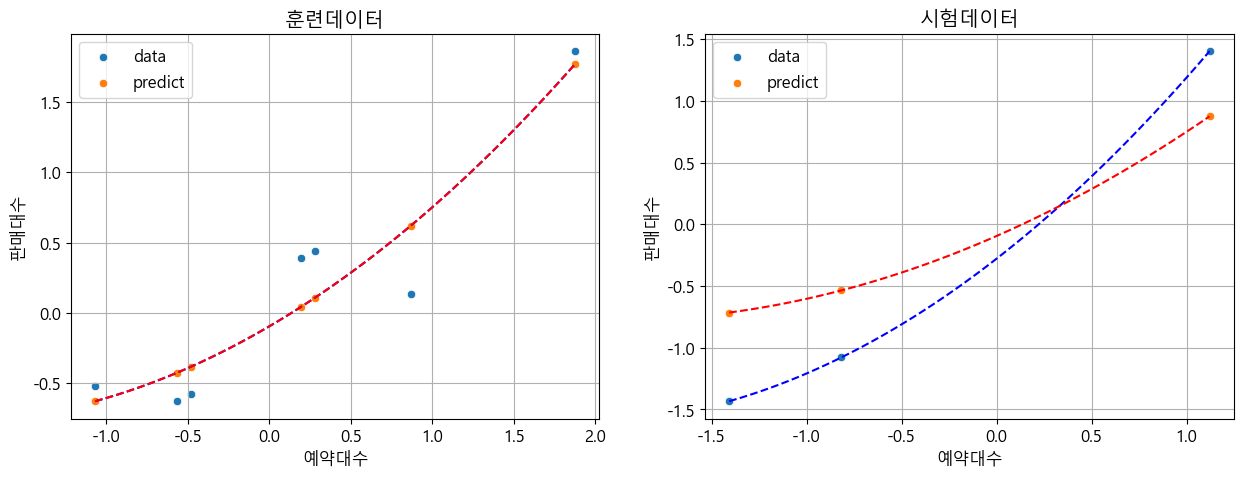

In [8]:
helper.regplot(ols.x_train['예약대수'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['예약대수'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

### 예측

In [9]:
# result = ols.fit.predict([[150]])
result = ols.fit.predict([[150, 150**2]])
result

c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3878.69457815])

In [10]:
"에어컨의 판매대수는 150대의 예약대수일 때 {0:0.1f}대 정도 판매될 것으로 예상.".format(result[0])

'에어컨의 판매대수는 150대의 예약대수일 때 3878.7대 정도 판매될 것으로 예상.'

# 문제 1-3

## 부모의 키에 따른 자식의 키 예측

아래의 데이터는 부모의 키에 따른 자식의 키를 조사한 데이터이다.

https://data.hossam.kr/E04/galton.xlsx

### 요구사항

1. 위 데이터를 분석하고 결과를 보고하시오.
2. 당신이 자식을 낳는다면 키가 어느정도일지 예측해 보시오.

### 데이터 가져오기

In [11]:
origin = read_excel("https://data.hossam.kr/E04/galton.xlsx")
origin.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


### 분석

In [12]:
ols = helper.ml_ols(origin, xnames="parent", yname="child", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

ols.table

계수:  [0.4494284  0.06189121]
절편:  -0.07187347712746538
훈련데이터의 설명력:  0.21339707956726806
R^2:  0.21339707956726806
MAE:  0.7058665943825817
MSE:  0.7833237754869969
RMSE:  0.8850558036005396
MAPE:  158.20599685632322
MPE:  78.03044031265047


,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,child,parent,0.449428,0.029168,0,15.408176,0.000000,1.258685
1,child,parent^2,0.061891,0.020334,0,3.043709,0.002403,1.006380


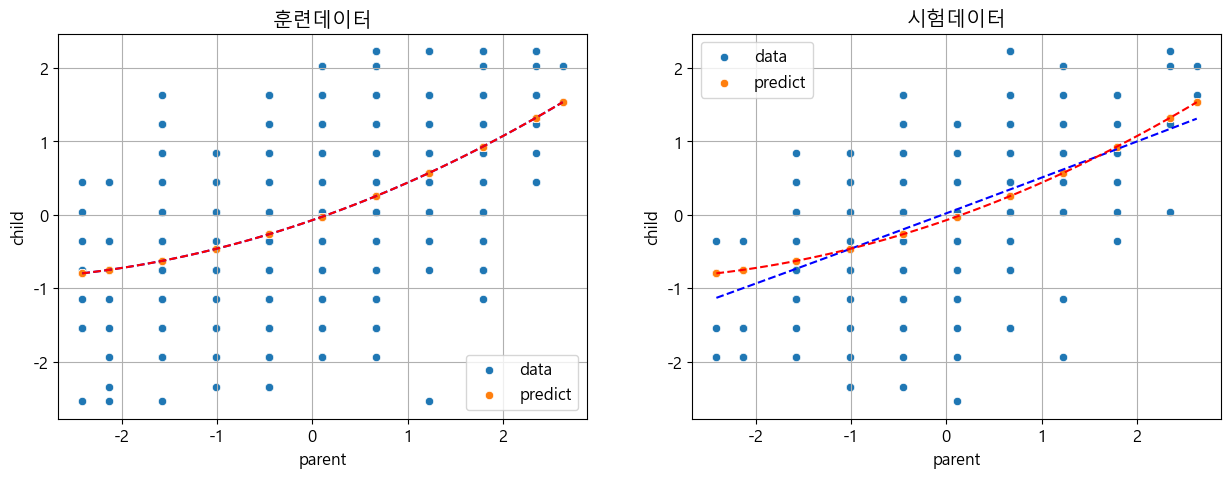

In [13]:
helper.regplot(ols.x_train['parent'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['parent'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

### 예측

In [14]:
result = ols.fit.predict([[68.9, 68.9**2]])
result

c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([324.70429467])

In [15]:
" 부모의 키가 68.9인 경우 내 자녀의 키는 {0:0.1f}inch 정도일 것으로 예상됩니다.".format(result[0])

' 부모의 키가 68.9인 경우 내 자녀의 키는 324.7inch 정도일 것으로 예상됩니다.'

# 문제2-1

## 당뇨병 발병 예측 모델

다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.

> https://data.hossam.kr/E04/diabetes.xlsx

| 변수 | 설명 |
|---|---|
| age | 나이 |
| sex | 성별 |
| bmi | bmi지수(비만도) |
| bp | 평균 혈압 |
| s1~s6 | 6종류의 혈액검사 수치 |
| target | 당뇨병 진행률(종속변수) |

주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

### 데이터 가져오기

In [16]:
origin = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
origin.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [17]:
origin['sex'].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

In [18]:
origin['sex'] = np.where(origin['sex'] < 0, 0, 1)
origin['sex'].value_counts()

sex
0    235
1    207
Name: count, dtype: int64

In [19]:
# xnames ='age','sex','bmi','bp','s1','s2','s3','s4','s5','s6','target'
# 직접 확인하면서 pvalue를 기준으로 유효한 데이터만 추출
xnames = "sex,bmi,bp,s1,s5"
ols = helper.ml_ols(origin, xnames=xnames, yname="target", degree=1, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)
print("검증데이터의 설명력: ", ols.testRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

# helper.prettyPrint(ols.table)

ols.table

계수:  [-0.09554113  0.36406129  0.17545029 -0.13811201  0.4215939 ]
절편:  -0.05274097123674022
훈련데이터의 설명력:  0.4935365620379497
검증데이터의 설명력:  0.4899795142543958
R^2:  0.4935365620379497
MAE:  0.5700099698796782
MSE:  0.4910963652884038
RMSE:  0.7007826804997422
MAPE:  223.8453602684888
MPE:  4.582374796339881


,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,target,sex,-0.095541,0.035153,0,-2.717886,0.006832,1.115603
1,target,bmi,0.364061,0.039414,0,9.236891,0.000000,1.624523
2,target,bp,0.175450,0.039211,0,4.474554,0.000010,1.414344
3,target,s1,-0.138112,0.039773,0,-3.472527,0.000567,1.365513
4,target,s5,0.421594,0.044122,0,9.555217,0.000000,2.034881


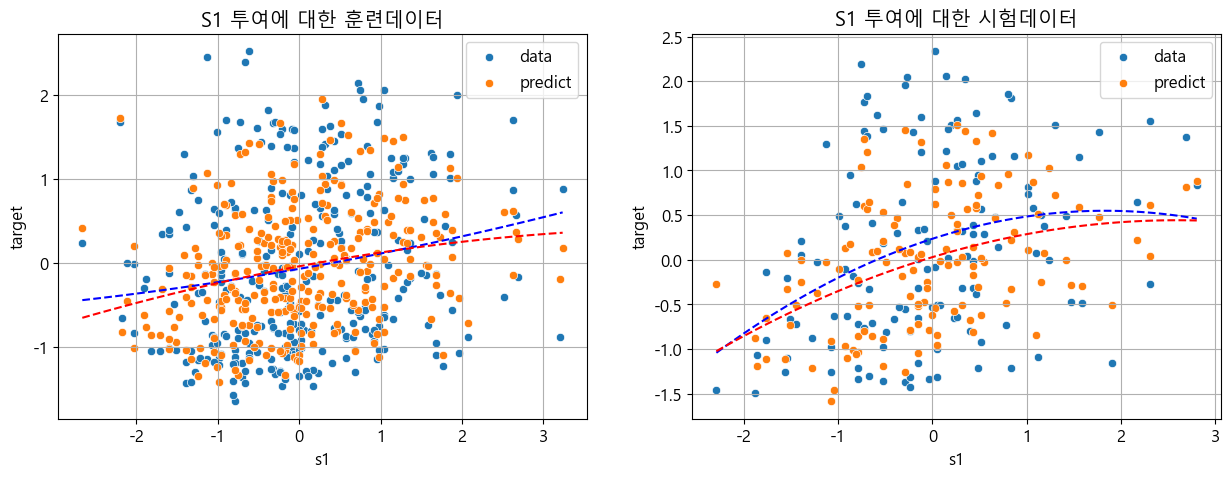

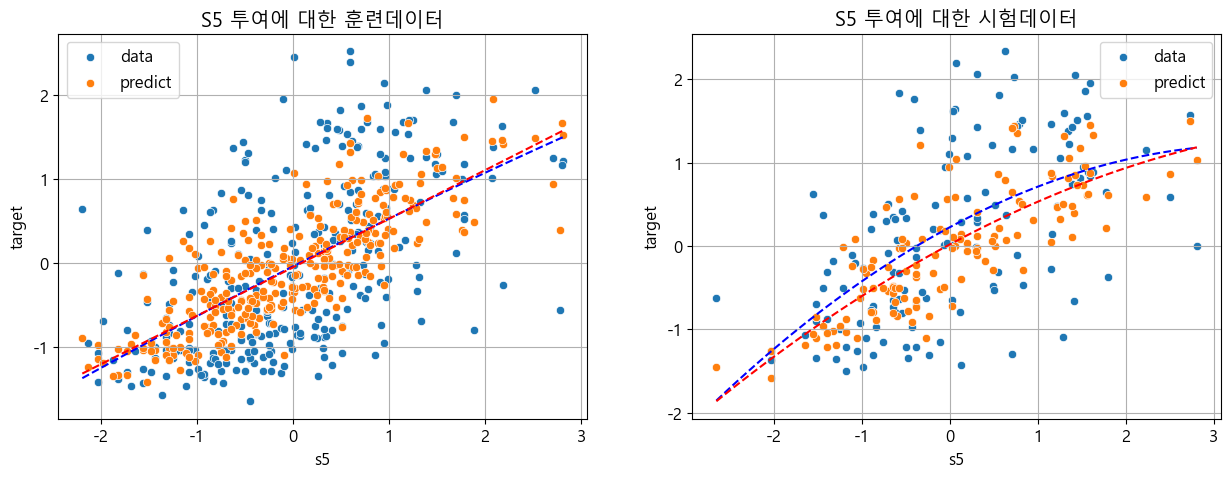

In [20]:
# 정설대로라면 남은 (독립)변수를 모두 지정해 그려주는게 정확
helper.regplot(ols.x_train['s1'], ols.y_train, ols.train_pred, "S1 투여에 대한 훈련데이터",
               ols.x_test['s1'], ols.y_test, ols.test_pred, "S1 투여에 대한 시험데이터",
               figsize=(15, 5))


helper.regplot(ols.x_train['s5'], ols.y_train, ols.train_pred, "S5 투여에 대한 훈련데이터",
               ols.x_test['s5'], ols.y_test, ols.test_pred, "S5 투여에 대한 시험데이터",
               figsize=(15, 5))

# 문제 2-2

## 뉴욕 멘하튼 주택 임대료 예측 모델

다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다. 분석하라

> https://data.hossam.kr/E04/manhattan.xlsx

### 데이터 가져오기

In [21]:
origin = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
origin.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## 데이터 전처리

### 명목형 변수 확인

In [22]:
origin['neighborhood'].value_counts()

neighborhood
Upper West Side        579
Upper East Side        500
Midtown East           460
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               132
Midtown                119
Tribeca                119
East Village           108
Battery Park City      104
Midtown South           85
Central Harlem          82
West Village            67
Greenwich Village       66
Gramercy Park           61
Soho                    58
Washington Heights      54
East Harlem             41
Lower East Side         41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Stuyvesant Town/PCV      3
Little Italy             3
West Harlem              2
Manhattanville           1
Name: count, dtype: int64

> 값의 종류가 지나치게 많으므로 이 변수는 제외

In [23]:
origin['borough'].value_counts()

borough
Manhattan    3539
Name: count, dtype: int64

> 값의 종류가 없으므로 이 변수도 제외하기로 함

### 불필요한 변수를 제거

In [24]:
df = origin.drop(['neighborhood', 'borough'], axis=1)
df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


### 분석 모델 적용

In [29]:
xnames = list(df.columns)
print(xnames)

['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']


In [30]:
xnames = list(df.columns)
xnames.remove('rent')
xnames.remove('has_elevator')
xnames.remove('has_roofdeck')
xnames.remove('has_washer_dryer')
xnames.remove('has_dishwasher')
xnames.remove('has_gym')
print(xnames)

['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_doorman', 'has_patio']


In [32]:
ols = helper.ml_ols(df, xnames=xnames, yname="rent", degree=1, test_size=0.3, use_scalling=True)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)
print("검증데이터의 설명력: ", ols.testRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

ols.table

계수:  [-0.09371914  0.20074505  0.74553076 -0.02729223  0.08347553 -0.10219161
 -0.02577317 -0.01124037 -0.0225104 ]
절편:  -0.01123480712619912
훈련데이터의 설명력:  0.7817727235086297
검증데이터의 설명력:  0.7698041157370112
R^2:  0.7817727235086297
MAE:  0.2933104508452643
MSE:  0.21453639177587452
RMSE:  0.46318073338155435
MAPE:  136.6873926687801
MPE:  -7.693555649056175


,종속변수,독립변수,B,표준오차,β,t,유의확률,VIF
0,rent,bedrooms,-0.093719,0.013051,0,-7.181175,8.388845e-13,2.858486
1,rent,bathrooms,0.200745,0.014145,0,14.191847,0.000000e+00,3.446674
2,rent,size_sqft,0.745531,0.015310,0,48.697091,0.000000e+00,6.475671
3,rent,min_to_subway,-0.027292,0.008119,0,-3.361615,7.831257e-04,1.055701
4,rent,floor,0.083476,0.008732,0,9.559994,0.000000e+00,1.245898
5,rent,building_age_yrs,-0.102192,0.009031,0,-11.315469,0.000000e+00,1.351504
6,rent,no_fee,-0.025773,0.008413,0,-3.063332,2.205391e-03,1.116846
7,rent,has_doorman,-0.011240,0.008208,0,-1.369361,1.709735e-01,1.076924
8,rent,has_patio,-0.022510,0.008036,0,-2.801196,5.119088e-03,1.032229


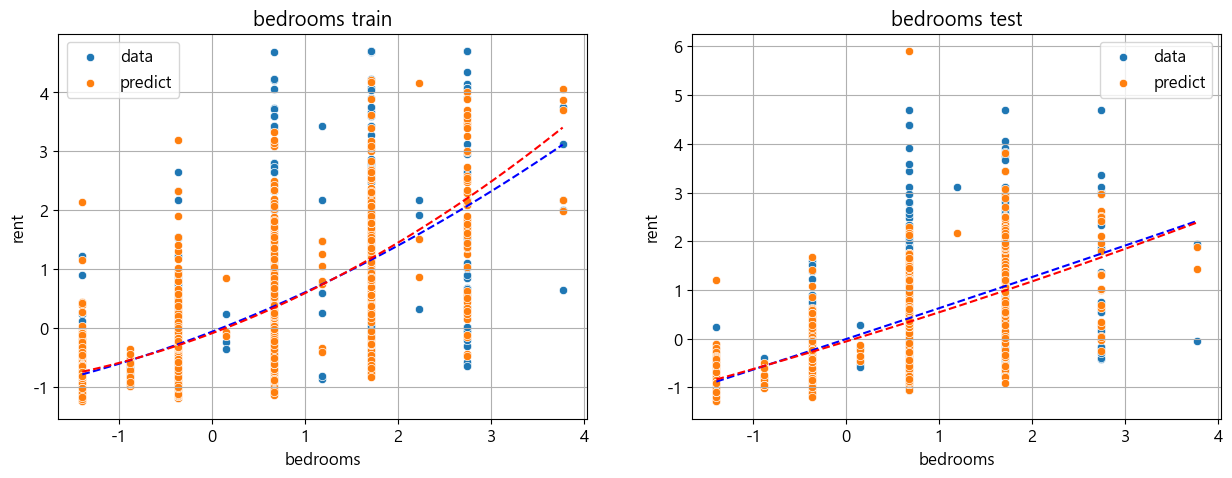

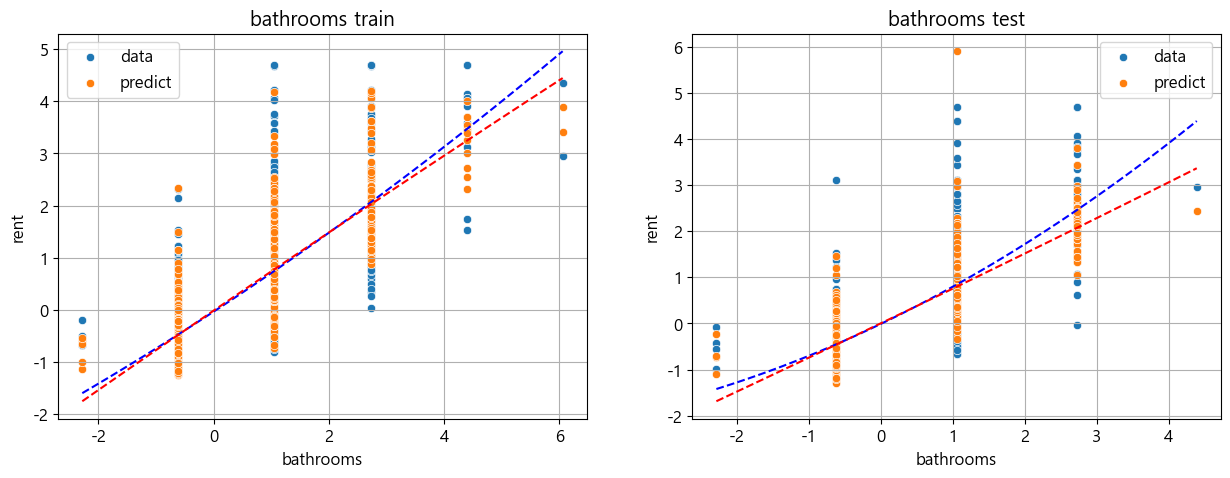

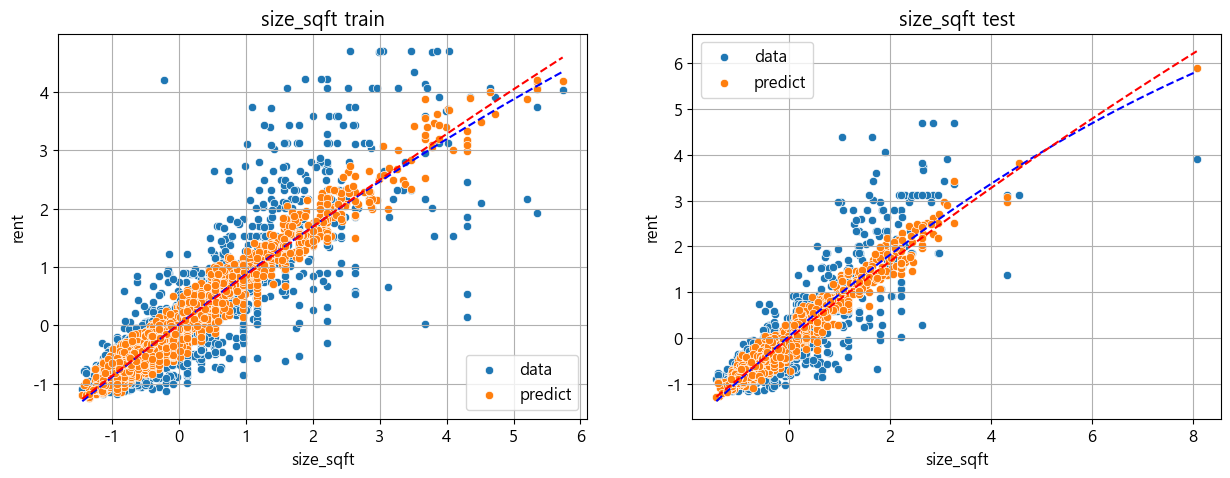

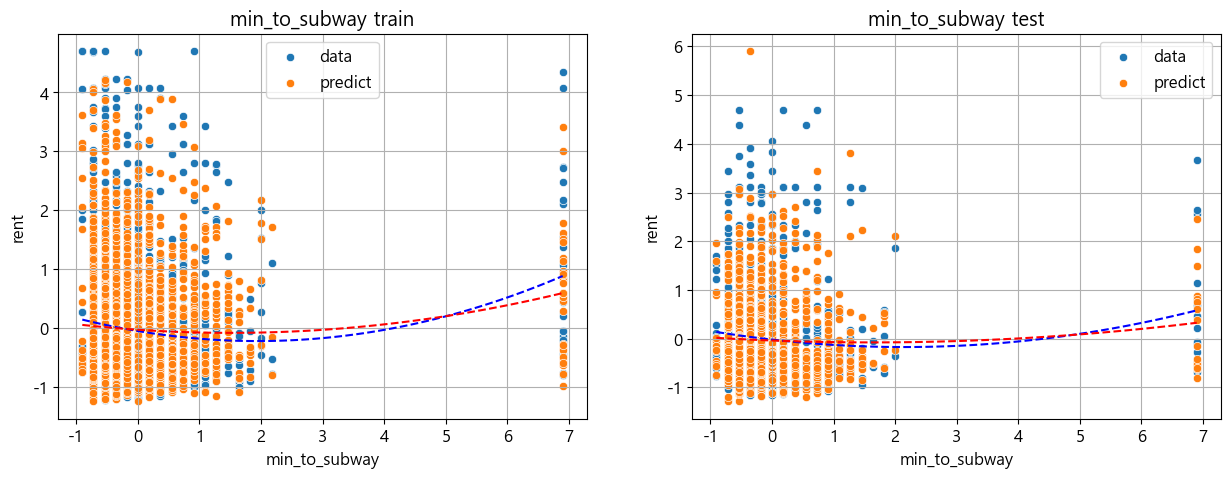

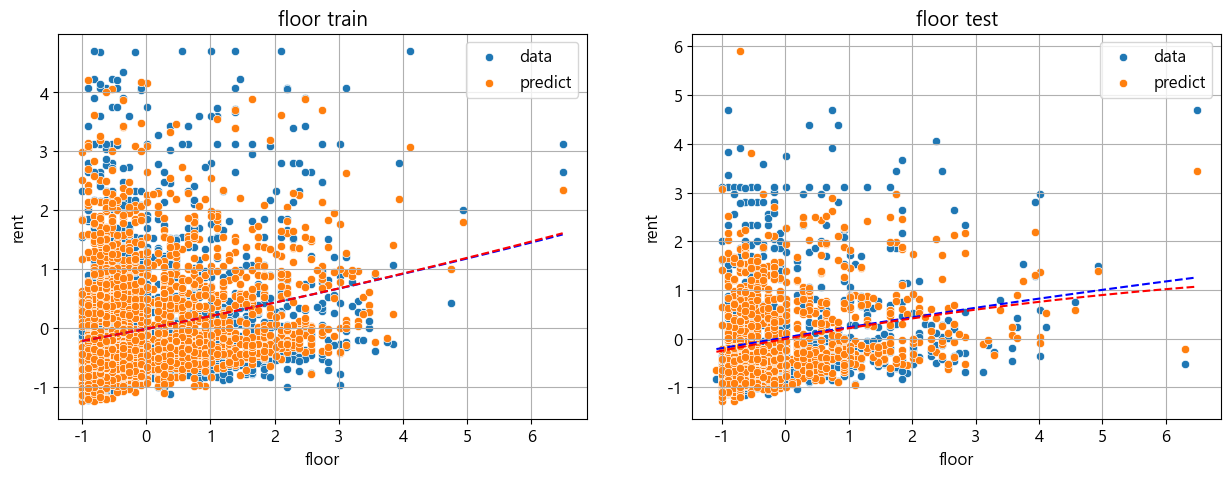

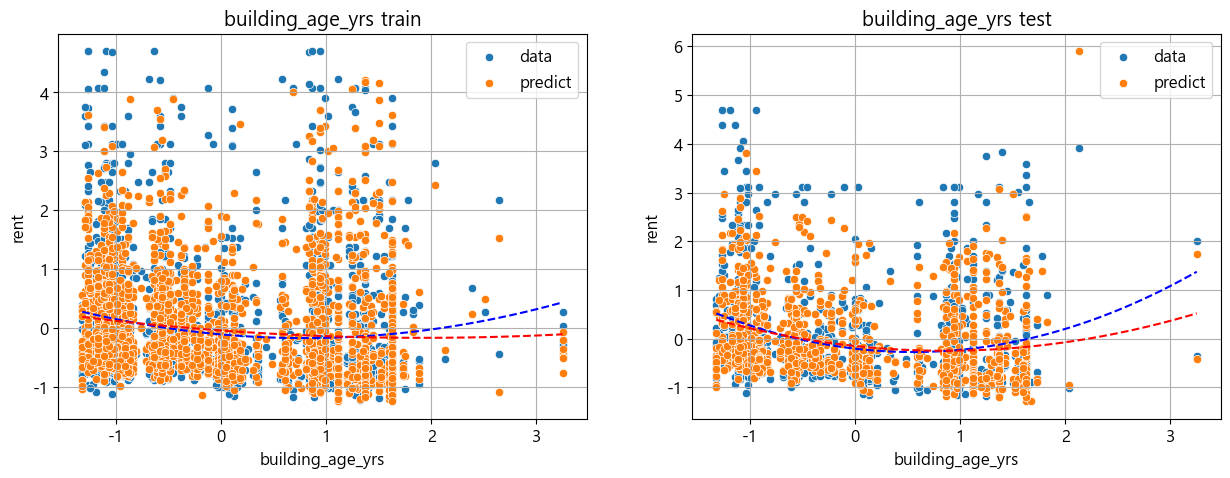

c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성


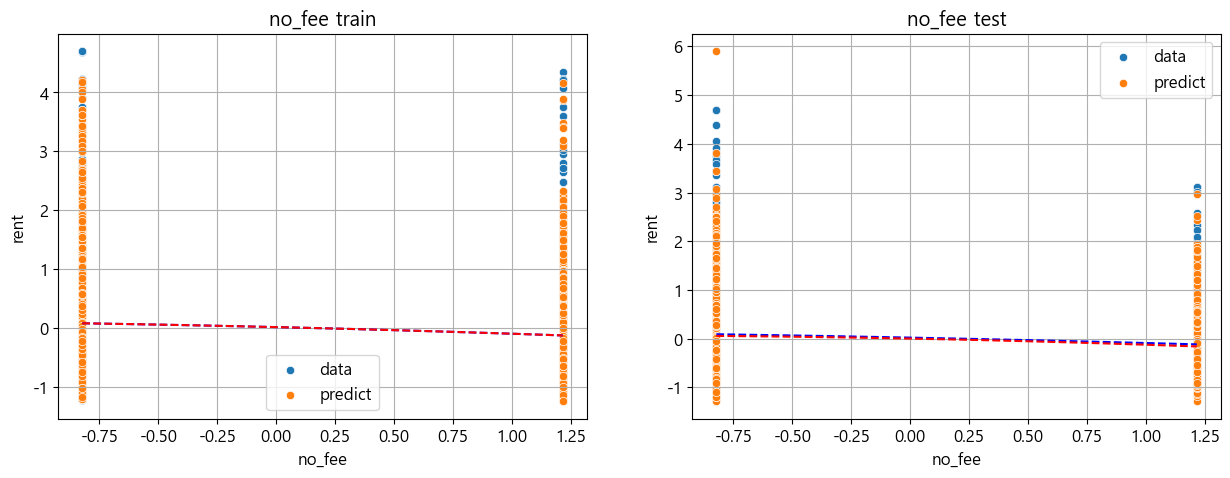

c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성


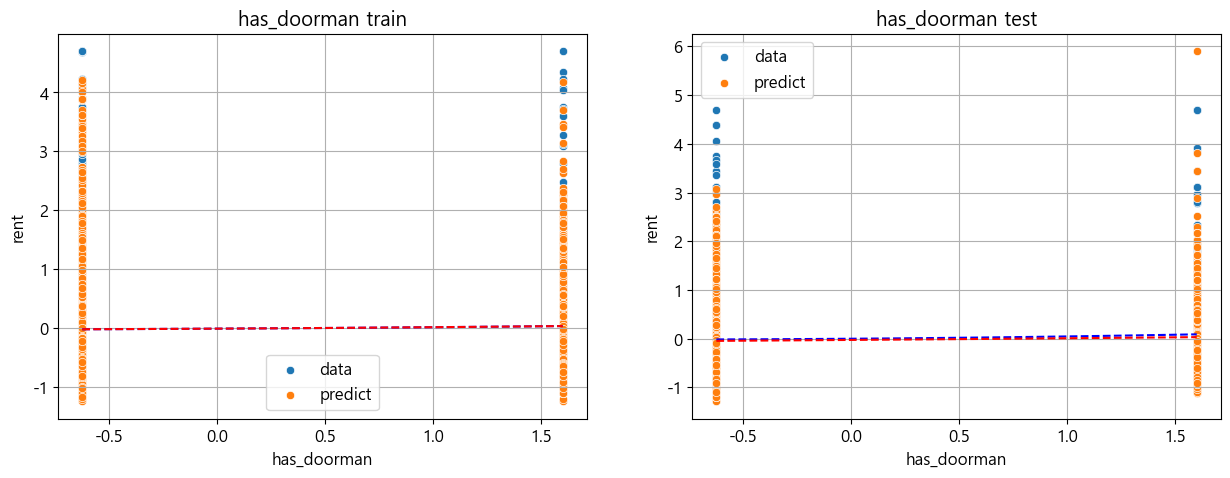

c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성
c:\Users\jehyu\Desktop\nationalSupport\jupyter\F. 데이터 마이닝\02. Sklearn\연습문제\../../..\helper.py:1377: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(x, y, degree)    #x에 따라 y값이 변하는 2차 방정식 생성


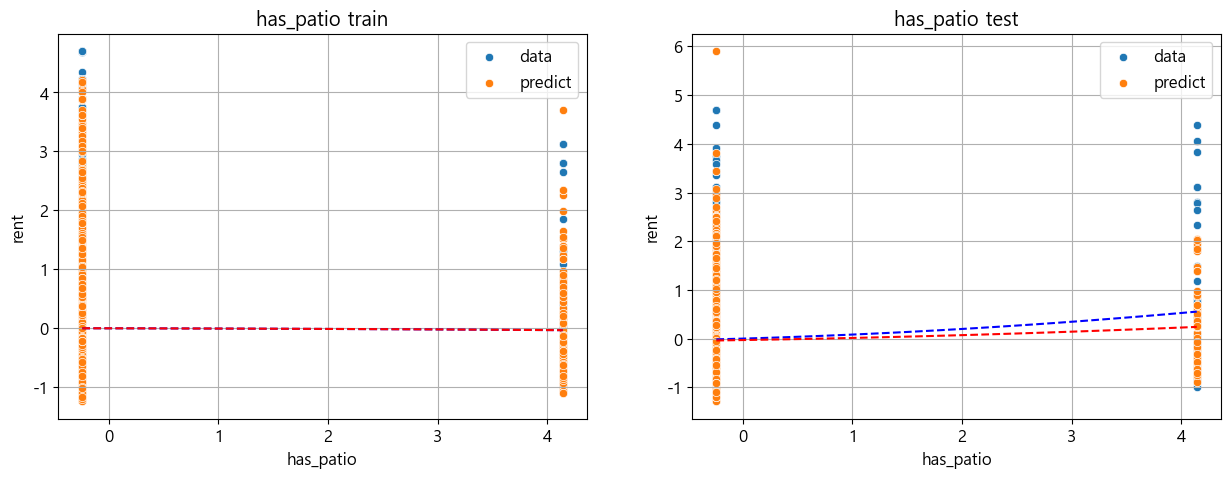

In [33]:
for x in xnames:
    helper.regplot(ols.x_train[x], ols.y_train, ols.train_pred, "%s train" % x,
               ols.x_test[x], ols.y_test, ols.test_pred, "%s test" % x,
               figsize=(15, 5)) #, save_path="manhattan_%s.png" % x 로 저장 가능